Resource: https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

1. Global Thresholding
    1. Manual Threshold
    2. Otsu’s Binarization
2. Adaptive Thresholding
    1. Adaptive Mean Thresholding
    2. Adaptive Gaussian Thresholding

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [61]:
SURFACE_TYPES = ["Rough surface", "White surface", "White + Contrast", "Contrast surface"]
LIGHT_TYPES = ["Good light", "Low light", "Shadow", "Half light"]

def show_all(imgs):
    plt.figure(figsize=(24, 16))
    for i in range(4):
        for j in range(4):
            for k in range(2):
                plt.subplot(4, 8, 8*i + 2*j + k + 1)
                plt.xticks([])
                plt.yticks([])
                if i == 0 and k == 0:
                    plt.title(LIGHT_TYPES[j], fontsize=16)
                if j == 0 and k == 0:
                    plt.ylabel(SURFACE_TYPES[i], fontsize=16)
                plt.imshow(imgs[i][j][k].astype("uint8"), "gray")

    plt.show()
    
def save_all(imgs, path_prefix="./"):
    for i in range(4):
        for j in range(4):
            for k in range(2):
                cv2.imwrite(f"{path_prefix}{i+1}_{j+1} ({k+1}).png", imgs[i][j][k])


# Original (grayscale)

In [58]:
images = [[[] for j in range(4)] for i in range(4)]
for i in range(4):
    for j in range(4):
        for k in range(2):
            images[i][j].append(cv2.imread(f"samples_1/{i+1}_{j+1} ({k+1}).png", cv2.IMREAD_GRAYSCALE))

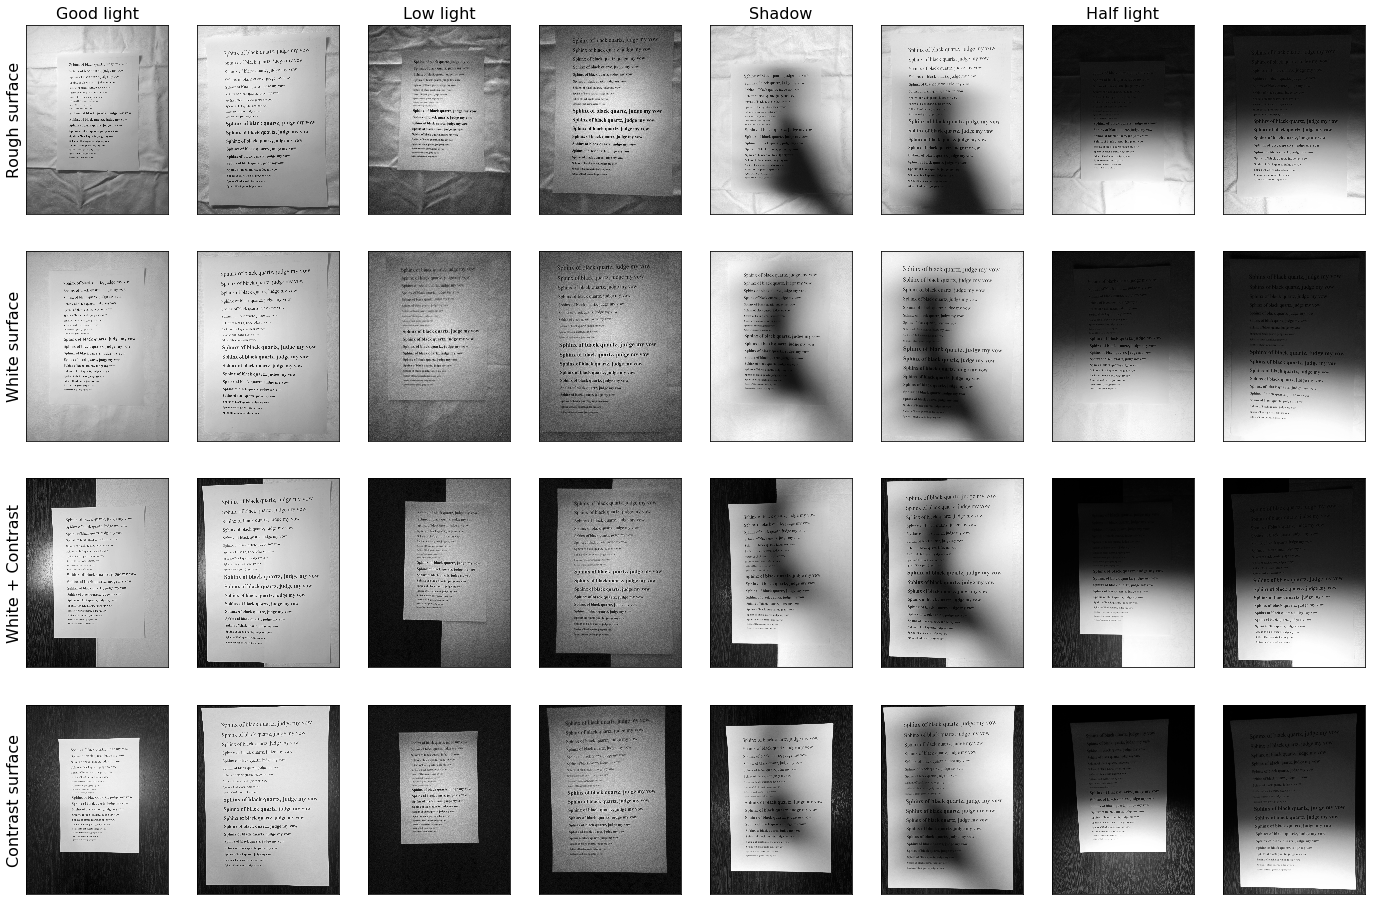

In [59]:
show_all(images)

# Binarization: Global Thresholding

## Manual Threshold

In [40]:
images_bin_simple = [[[] for j in range(4)] for i in range(4)]
for i in range(4):
    for j in range(4):
        for k in range(2):
            ret, img_bin = cv2.threshold(images[i][j][k], 127, 255, cv2.THRESH_BINARY)
            images_bin_simple[i][j].append(img_bin)

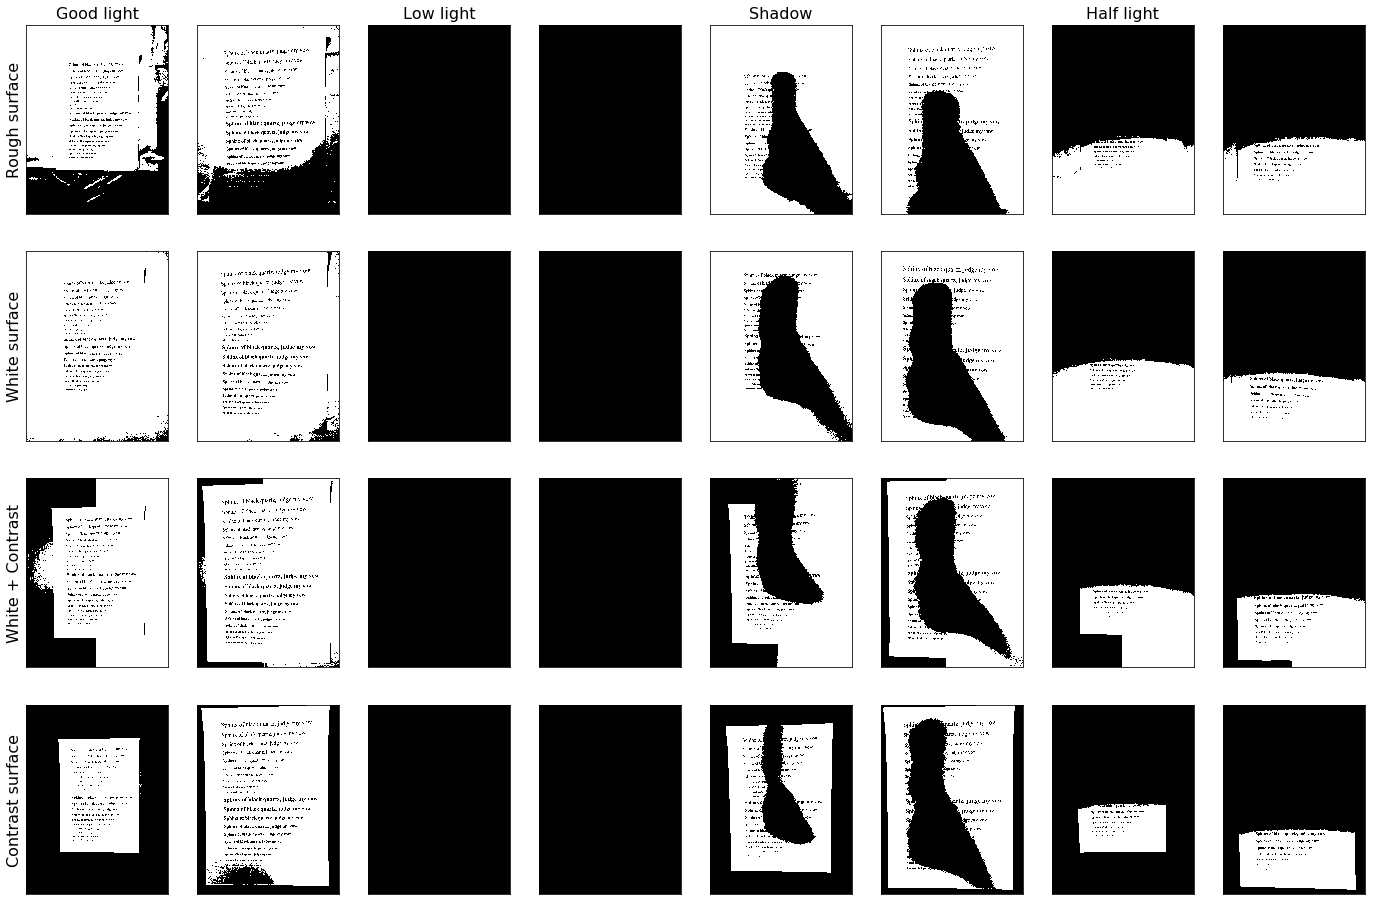

In [60]:
show_all(images_bin_simple)
save_all(images_bin_simple, "samples_1_bin/simple/")

## Otsu’s Binarization

In [98]:
images_bin_otsu = [[[] for j in range(4)] for i in range(4)]
rets = [[[] for j in range(4)] for i in range(4)]
for i in range(4):
    for j in range(4):
        for k in range(2):
            ret, img_bin = cv2.threshold(images[i][j][k], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            images_bin_otsu[i][j].append(img_bin)
            rets[i][j].append(ret)

In [100]:
print(np.array(rets))

[[[137. 140.]
  [ 45.  44.]
  [136. 128.]
  [116. 118.]]

 [[165. 160.]
  [ 31.  31.]
  [140. 131.]
  [116. 125.]]

 [[111. 111.]
  [ 22.  21.]
  [111. 120.]
  [114. 119.]]

 [[128.  98.]
  [ 24.  21.]
  [106. 117.]
  [123. 122.]]]


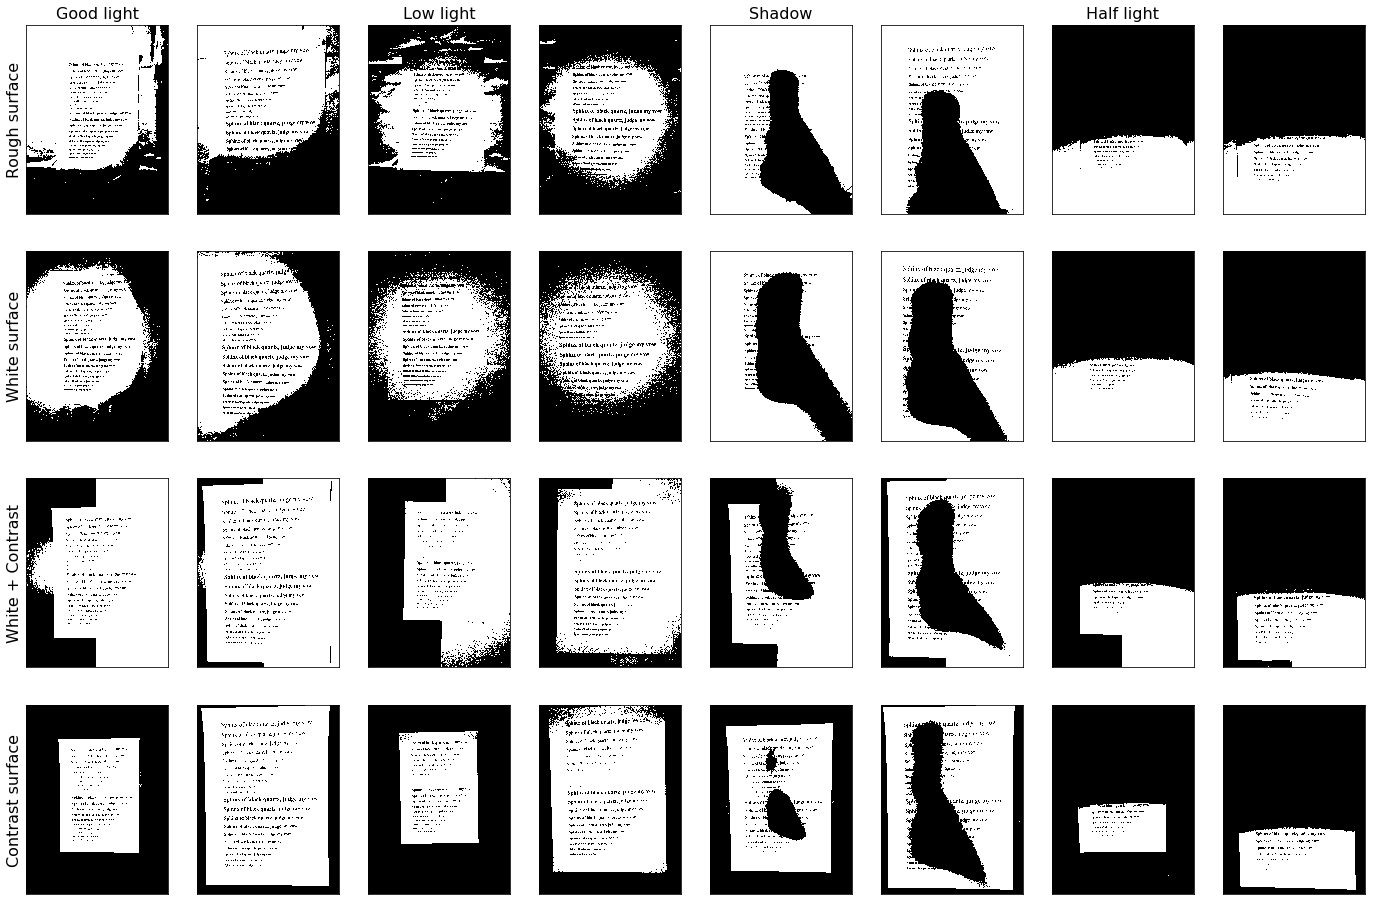

In [101]:
show_all(images_bin_otsu)
save_all(images_bin_otsu, "samples_1_bin/otsu/")

# Binarization: Adaptive Thresholding

## Adaptive Mean Thresholding

In [88]:
images_bin_mean = [[[] for j in range(4)] for i in range(4)]
for i in range(4):
    for j in range(4):
        for k in range(2):
            img_bin = cv2.adaptiveThreshold(images[i][j][k], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
            images_bin_mean[i][j].append(img_bin)

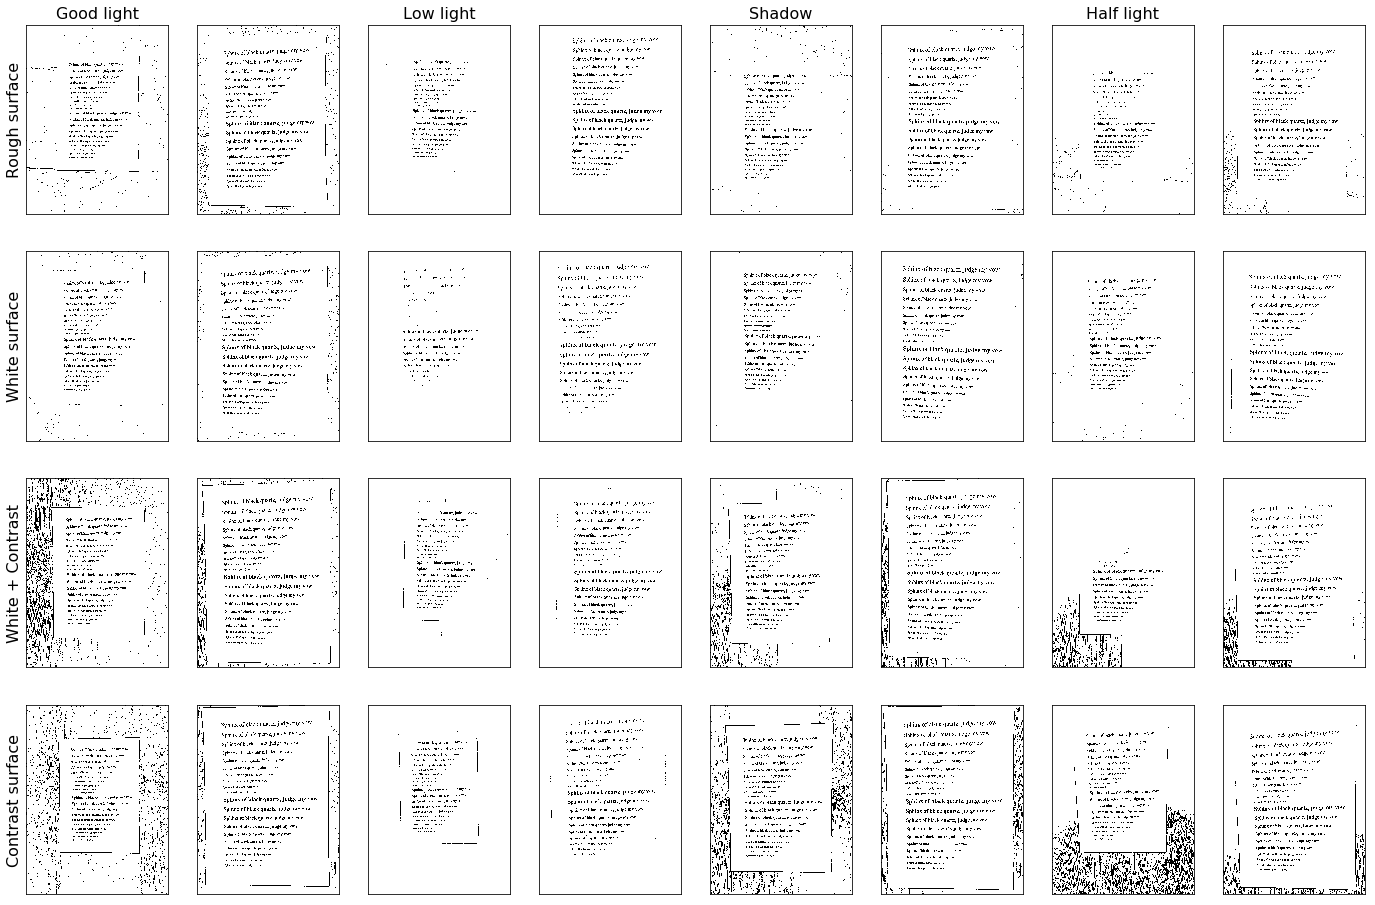

In [89]:
show_all(images_bin_mean)
save_all(images_bin_mean, "samples_1_bin/mean/")

## Adaptive Gaussian Thresholding

In [96]:
images_bin_gaussian = [[[] for j in range(4)] for i in range(4)]
for i in range(4):
    for j in range(4):
        for k in range(2):
            img_bin = cv2.adaptiveThreshold(images[i][j][k], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 4)
            images_bin_gaussian[i][j].append(img_bin)

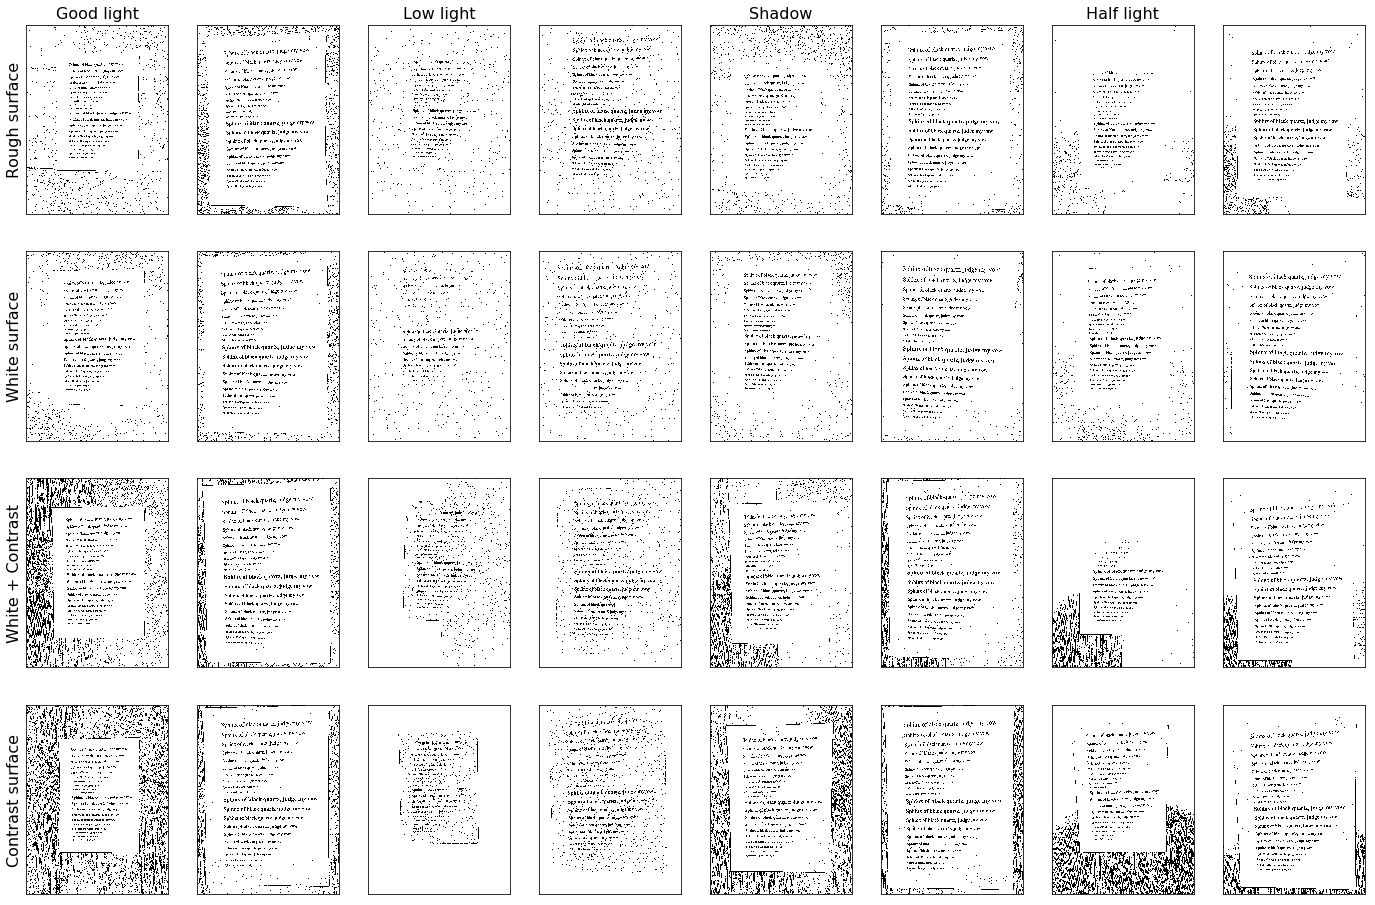

In [97]:
show_all(images_bin_gaussian)
save_all(images_bin_gaussian, "samples_1_bin/gaussian/")